In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Cargamos el Dataset
df = pd.read_csv("C:/Users/braya/OneDrive - Universidad Nacional Abierta y a Distancia/Desktop/UNAD/SEMESTRE 5/ANALISIS DE DATOS/TAREA 5/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")


In [3]:
#Traemos los primeros 5 datos de cada columna
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Presentamos la información general de cada columna, como el nombre, si hay valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Variable Definition Key

survival Survival 0 = No, 1 = Yes

pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex Sex

Age Age in years

sibsp # of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

ticket Ticket number

fare Passenger fare

cabin Cabin number

embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#Presentamos las principales estadisticas (suma, media, desviación estandar, minimo, cuartiles, maximo)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Determinamos cuantas columnas y filas hay
df.shape

(891, 12)

# Procesamiento de datos

In [7]:
columnas = list(df.select_dtypes(include = ['object']).columns)
#Para seleccionar las columnas que tiene como tipo de dato object
columnas

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
for columna in columnas:
    print(f'El nombre de la columna: {columna}')
    print(list(df[f'{columna}'].value_counts().index))
    #Obtenemos la lista de las columnas con cada una de sus categorias por indice
    print('\n')

El nombre de la columna: Name
['Braund, Mr. Owen Harris', 'Boulos, Mr. Hanna', 'Frolicher-Stehli, Mr. Maxmillian', 'Gilinski, Mr. Eliezer', 'Murdlin, Mr. Joseph', 'Rintamaki, Mr. Matti', 'Stephenson, Mrs. Walter Bertram (Martha Eustis)', 'Elsbury, Mr. William James', 'Bourke, Miss. Mary', 'Chapman, Mr. John Henry', 'Van Impe, Mr. Jean Baptiste', 'Leitch, Miss. Jessie Wills', 'Johnson, Mr. Alfred', 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")', 'Taussig, Miss. Ruth', 'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)', 'Slabenoff, Mr. Petco', 'Harrington, Mr. Charles H', 'Torber, Mr. Ernst William', 'Homer, Mr. Harry ("Mr E Haven")', 'Lindell, Mr. Edvard Bengtsson', 'Karaic, Mr. Milan', 'Daniel, Mr. Robert Williams', 'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)', 'Shutes, Miss. Elizabeth W', 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)', 'Jarvis, Mr. John Denzil', 'Paulner, Mr. Uscher', 'Murphy, Miss. Margaret Jane', 'Harris, Mr. George', 'de Messemaeker, Mrs.

<Axes: >

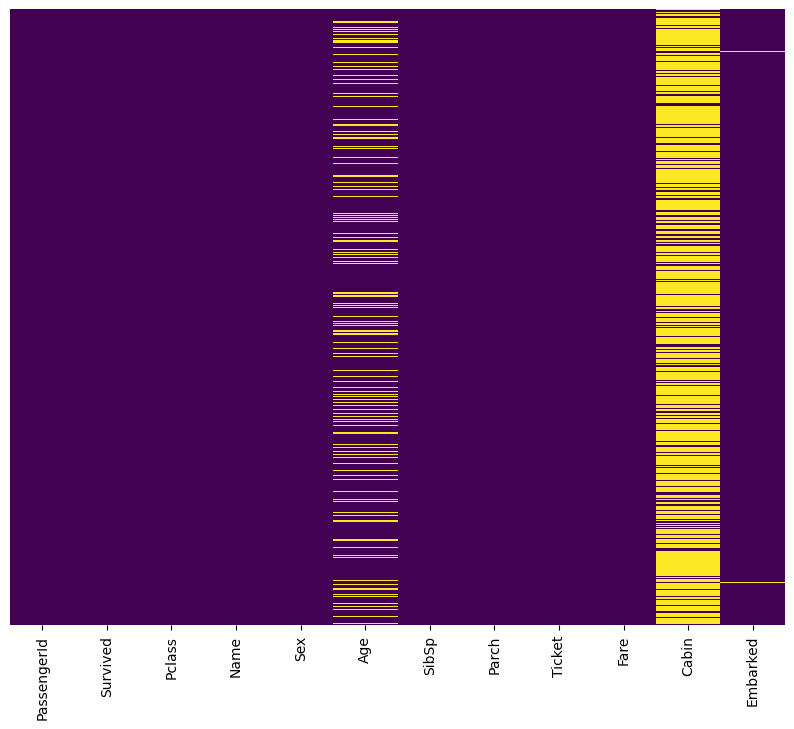

In [9]:
#Analisis de valores faltantes
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
#Contamos cuantos valores nulos hay en cada columna
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#La funcion contruye un diccionario por columna done reemplaza las categorias por numeros
def procesar_datos():
    global df_proc
    df_proc = df
    
    a = {'male': 0,
         'female': 1
    }

    df_proc['Sex'] = df_proc['Sex'].map(a)
    
    a = {'S': 1,
         'C': 2,
         'Q': 3
    }

    df_proc['Embarked'] = df_proc['Embarked'].map(a)

In [12]:
procesar_datos()

df_proc
#Se observa que las variables categoricas ahora se presentan como numeros con el fin de facilitar el análisis de modelos predictivos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0


In [13]:
#Eliminamos la columna name y passengerid ya que no es importante para el análisis que queremos hacer, la columna Cabin
#ya que faltan muchos registos y la columna Ticket ya que no se puede agrupar en categorias
df_proc = df_proc.drop(columns=['Cabin','Name','Ticket', 'PassengerId'])
df_proc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [14]:
# Calcula el promedio de la columna 'Age' para reemplazar los valores faltantes
mean_age = df_proc['Age'].mean()

# Rellena los valores faltantes en la columna 'Age' con el promedio
df_proc['Age'].fillna(mean_age, inplace=True)

# Calcula el promedio de la columna 'Embarked' para reemplazar los valores faltantes
mean_embarked = df_proc['Embarked'].mean()

# Rellena los valores faltantes en la columna 'Embarked' con el promedio
df_proc['Embarked'].fillna(mean_embarked, inplace=True)

df_proc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


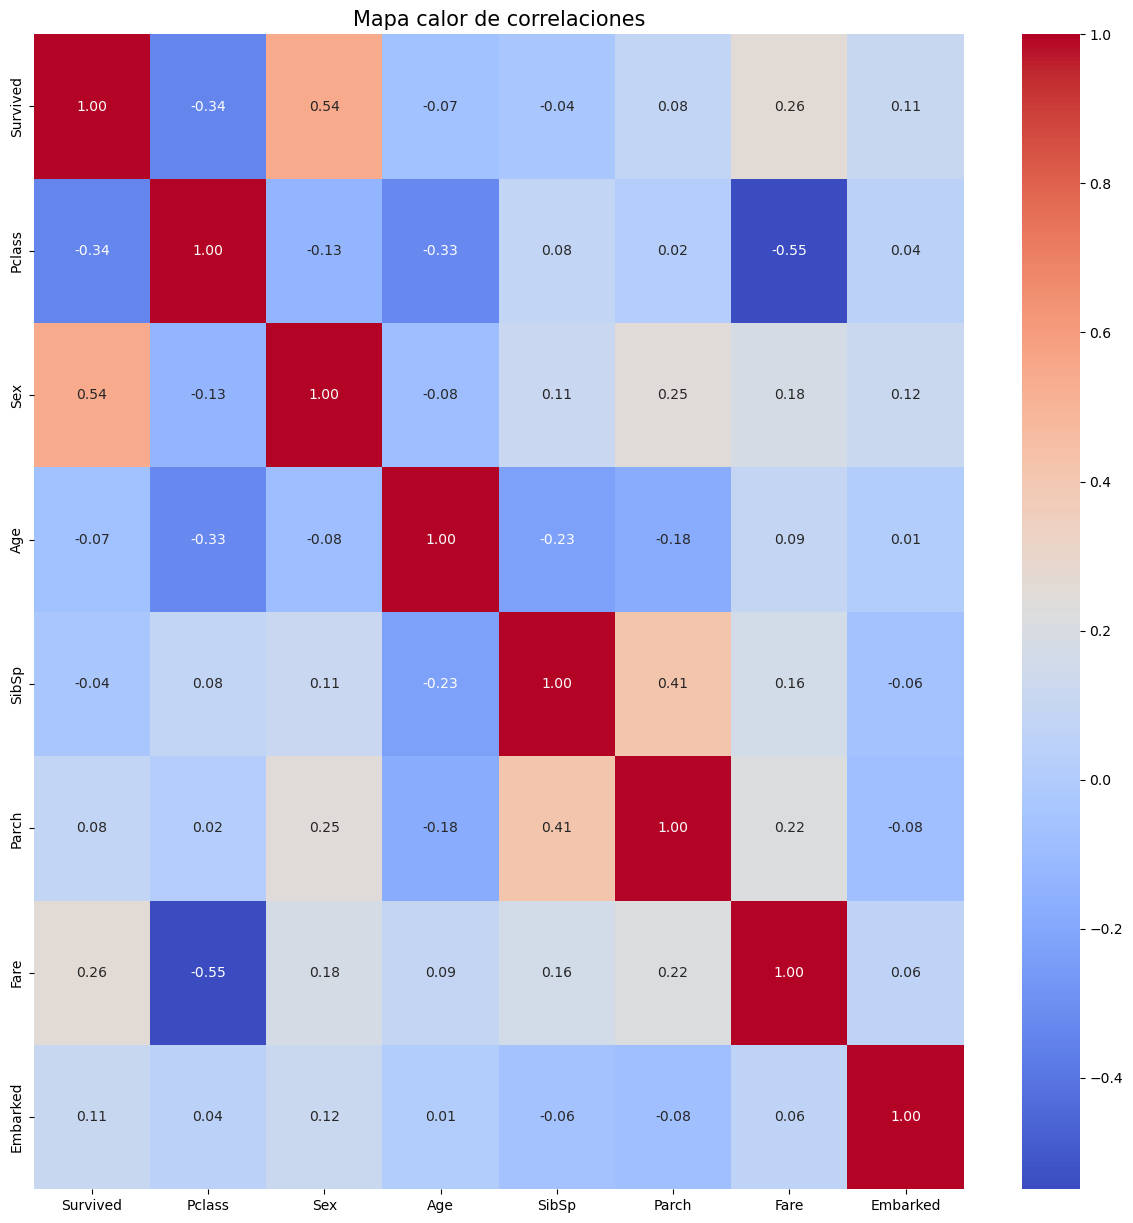

In [15]:
#Matriz de correlación
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(df_proc.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
#Corr es el metodo de correlación entre variables
#annot permite visualizar anotaciones; Cmap permite darle color al mapa; fmt es la cantidad de decimales
plt.title('Mapa calor de correlaciones', fontsize = 15)
plt.show()

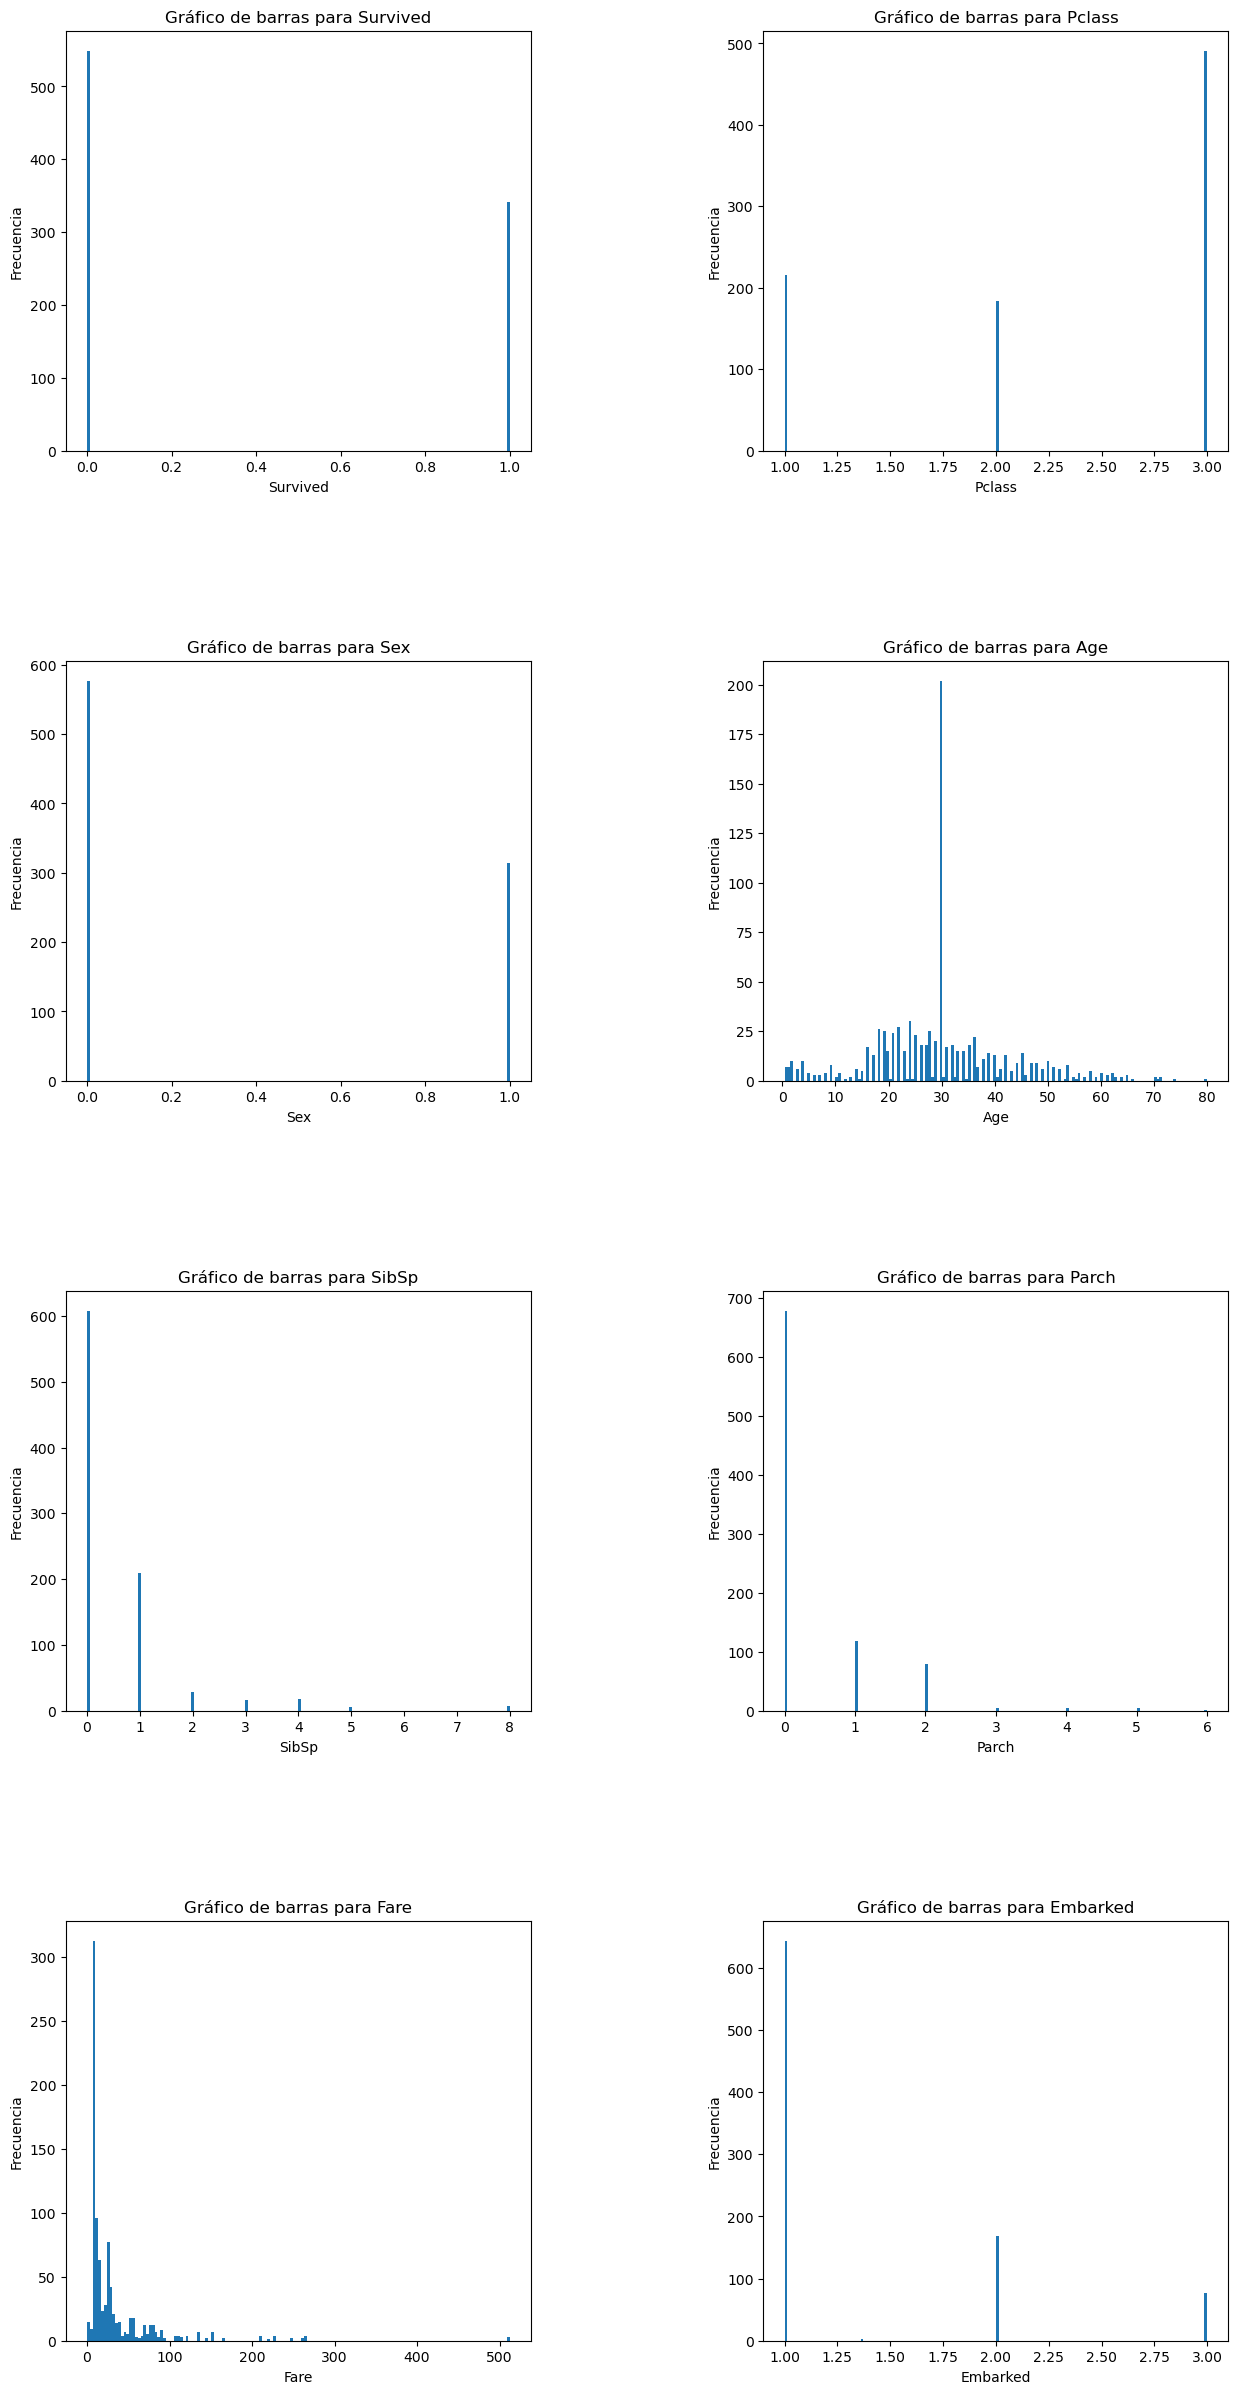

In [16]:
#Graficamos las variables numericas en graficos de histogramas
n_filas = 4
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15, 30)) #Dentro de la misma figura creamos 8 graficas

plt.subplots_adjust(wspace=0.5, hspace=0.5)

columnas = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        
        # Crear el gráfico de histograma en el subplot correspondiente
        axs[fila, col].hist(df_proc[columna], bins=150)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# Modelos de predicción

In [17]:
from sklearn.model_selection import train_test_split
#Divide las bases en datos de entrenamiento (aprender) y datos de prueba (pronosticar)
from sklearn.linear_model import LogisticRegression
#Los anteriores son modelos diferentes de machine learning (modelos de clasificación)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#Metricas de evaluación para saber cual de los 4 modelos funciona mejor

In [18]:
#Creamos una funcion para presentar los modelos y su evaluacion con las diferentes metricas
def crea_modelos():
    global df_proc, resultados
    y = df_proc['Survived']
    x = df_proc.drop(columns=['Survived'])
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
    
    #Diccionario de modelos
    models = {
        'Regresión Logística': LogisticRegression(),
    }
    
    #Diccionario de resultados para modelos de regresión
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)

        #Metricas
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [19]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
    print(model)
    print(resultados['Accuracy'][i])
    print(resultados['Precision'][i])
    print(resultados['Recall'][i])
    print(resultados['F1-score'][i])
    print(resultados['AUC-ROC'][i])
    print('\n')
#Para mostrar los resultados de cada modelo

Regresión Logística
0.7985074626865671
0.6989247311827957
0.7142857142857143
0.7065217391304348
0.861023157633327




C:\Users\braya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados():
    global df_proc, resultados
    results_df = pd.DataFrame(resultados)
    #Transforma la lista de resultados en un DF
    results_df.set_index('Model', inplace=True)
    #Asignamos el indice al nombre del modelo

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    #Se transpone el dataframe
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
    #Cada modelo lleva un color diferente

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

C:\Users\braya\AppData\Local\Temp\ipykernel_31884\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
C:\Users\braya\AppData\Local\Temp\ipykernel_31884\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)


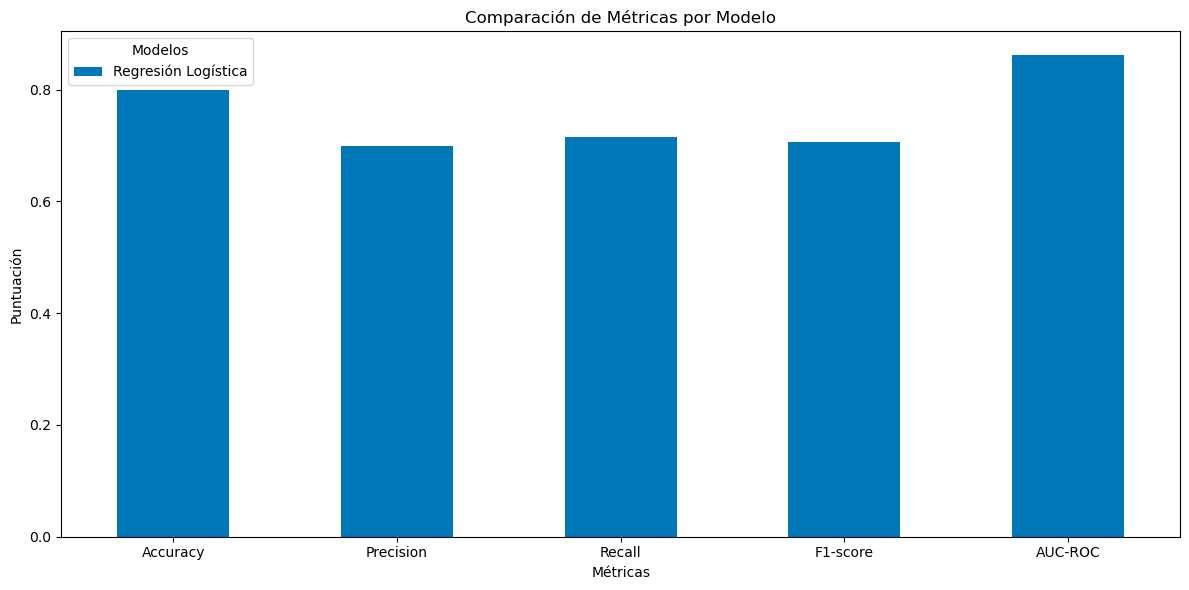

In [21]:
visualiza_resultados()
#Evaluamos cada modelo segun las metricas evaluadas